### UNSUPERVISED MACHINE LEARNING FOR THE CLASSIFICATION OF ASTROPHYSICAL X-RAY SOURCES

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sim_data = pd.read_csv('gmm6_allvar_0_simbad.csv')

In [4]:
sim_df = sim_data[['col1', 'name', 'main_type', 'cluster', 'prob_0', 'prob_1', 'prob_2', 'prob_3', 'prob_4', 'prob_5']]
prob_cols = ['prob_0', 'prob_1', 'prob_2', 'prob_3', 'prob_4', 'prob_5']

In [5]:
sim_df_clean = sim_df.copy().fillna('NaN')

In [6]:
sim_df_clean.head()

,col1,name,main_type,cluster,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5
0,0,2CXO J000002.9-350332,QSO,1,0.0,1.000000,2.363048e-13,2.995254e-09,1.146411e-12,3.435164e-12
1,1,2CXO J000010.0-501526,NaN,1,0.0,0.999999,1.305343e-08,1.160372e-06,3.551698e-12,4.150272e-14
2,2,2CXO J000019.8-245030,NaN,1,0.0,1.000000,3.094144e-08,8.366087e-18,3.541334e-12,2.132033e-14
3,3,2CXO J000025.4-245419,AGN,2,0.0,0.000002,9.999978e-01,1.474708e-07,2.695590e-09,1.221205e-08
4,4,2CXO J000027.4-500421,NaN,1,0.0,0.947932,5.203748e-02,1.057091e-20,3.054877e-05,1.025650e-07


In [7]:
def create_summary_tables(df):
    tables = []
    for n in np.unique(df.cluster):
        data_n = df[sim_df_clean.cluster == n]
        mean_probs = data_n.groupby(['main_type'])[prob_cols].agg(['mean'])
        count_obs = data_n.groupby(['main_type']).size()
        df_n = pd.concat([mean_probs, count_obs],axis=1)
        df_n = df_n.rename(columns={0:'size'})
        tables.append(df_n)
    return tables

In [8]:
tables = create_summary_tables(sim_df_clean)

In [28]:
quer = tables[5].sort_values(by='size', ascending=False).head(10)

In [29]:
quer['size'].to_latex('tex.txt')

In [105]:
prob_data = pd.read_csv('./mahalanobis_labeled/cl5_mean.csv')

In [106]:
src = "2CXO J031948.1+413046"
probas = prob_data[prob_data.name == "src
probas = probas.iloc[:, 4:]

In [107]:
probas.columns

Index(['PartofG', 'Pulsar', 'Radio', 'Seyfert_2', 'YSO'], dtype='object')

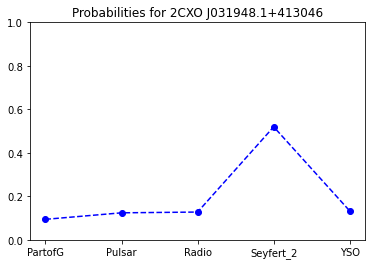

In [109]:
plt.plot(probas.columns, probas.iloc[0], marker='o', color='blue', linestyle='dashed')
plt.title('Probabilities for ' + src)
plt.ylim([0, 1])
plt.show()